# Udemy Courses Final Project

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading & Inspecting Data

In [52]:
df = pd.read_csv("udemy_courses.csv")
df.sample(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
850,364206,Media Training for Financial Service Professio...,https://www.udemy.com/media-training-for-finan...,True,20,1254,2,64,All Levels,7 hours,2014-12-11T21:14:18Z,Business Finance,25080,2014-12-11,21:14:18Z,2014,12,11
3085,846832,So you think you know JavaScript?,https://www.udemy.com/so-you-think-you-know-ja...,True,50,1010,154,25,All Levels,6 hours,2016-05-12T14:52:32Z,Web Development,50500,2016-05-12,14:52:32Z,2016,5,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3683 non-null   int64 
 1   course_title         3683 non-null   object
 2   url                  3683 non-null   object
 3   is_paid              3683 non-null   bool  
 4   price                3683 non-null   int64 
 5   num_subscribers      3683 non-null   int64 
 6   num_reviews          3683 non-null   int64 
 7   num_lectures         3683 non-null   int64 
 8   level                3683 non-null   object
 9   content_duration     3683 non-null   object
 10  published_timestamp  3683 non-null   object
 11  subject              3683 non-null   object
 12  profit               3683 non-null   int64 
 13  published_date       3683 non-null   object
 14  published_time       3682 non-null   object
 15  year                 3683 non-null   int64 
 16  month 

In [7]:
df[['price','num_subscribers','num_reviews','num_lectures','profit']].describe().round(2)

,price,num_subscribers,num_reviews,num_lectures,profit
count,3683.00,3683.00,3683.00,3683.00,3683.00
mean,65.99,3193.37,156.45,40.06,240288.46
std,60.99,9498.23,935.08,50.37,1000759.56
min,0.00,0.00,0.00,0.00,0.00
25%,20.00,110.00,4.00,15.00,1567.50
50%,45.00,911.00,18.00,25.00,23050.00
75%,95.00,2537.50,67.00,45.00,118260.00
max,200.00,268923.00,27445.00,779.00,24316800.00


---

## Exploratory Data Analysis (EDA)

- Univariate / Bi-Variate / Multi-Variate Analysis 

- ***Course Title***
    - What is the most frequent words in course title
    - Longest/Shortest course title
    - Most famous courses by number of subscribers

##### Number of unique course titles

In [9]:
df['course_title'].nunique()

3668

##### The most frequent words in course title

In [28]:
df['course_title'].str.split(expand=True).stack().value_counts()

-               672
to              639
Learn           493
for             432
and             410
               ... 
Fantail           1
Ships             1
Illustrator!      1
Reilly            1
Websites:         1
Length: 5430, dtype: int64

##### Longest/Shortest course title

In [32]:
df['course_title'].str.len().max()

243

In [33]:
df['course_title'].str.len().min()

6

In [37]:
df.iloc[df['course_title'].str.len().idxmax()]['course_title']

'Aprende a tocar el Acordeón \'de oído y con técnica",https://www.udemy.com/aprende-a-tocar-el-acordeon-de-oido-y-con-tecnica/,true,25,93,21,34,Beginner Level,4 hours,2014-09-16T19:51:45Z\n263432,Aprende los Secretos de la Armónica con HARP&SOUL"'

In [38]:
df.iloc[df['course_title'].str.len().idxmin()]['course_title']

'调色高级讲解'

##### Most famous course titles by number of subscribers

In [43]:
df.sort_values(by='num_subscribers', ascending=False)['course_title'].head(5)

2832                 Learn HTML5 Programming From Scratch
3037                       Coding for Entrepreneurs Basic
3235                           The Web Developer Bootcamp
2788    Build Your First Website in 1 Week with HTML5 ...
3237                The Complete Web Developer Course 2.0
Name: course_title, dtype: object

---

+ ***Subjects / Category***
    - How many courses per subject
    - Which subject is the most popular
    - Distribution of subjects per year
    - How many people purchase a particular subject

##### Number of courses per subjects

In [19]:
df['subject'].value_counts()

Web Development        1200
Business Finance       1199
Musical Instruments     681
Graphic Design          603
Name: subject, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subject', ylabel='count'>

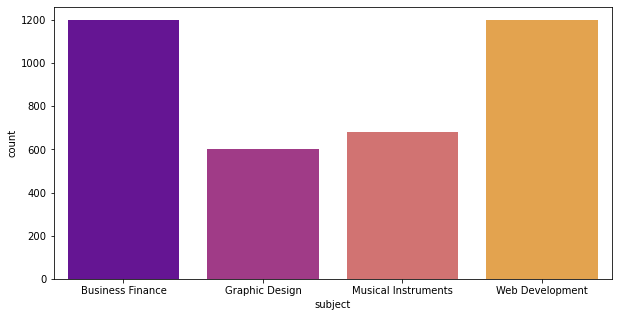

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(df['subject'],palette='plasma')

##### Number of subscribers per subject

In [23]:
df.groupby('subject')['num_subscribers'].sum()

subject
Business Finance       1870747
Graphic Design         1063148
Musical Instruments     846719
Web Development        7980572
Name: num_subscribers, dtype: int64

<AxesSubplot:xlabel='subject'>

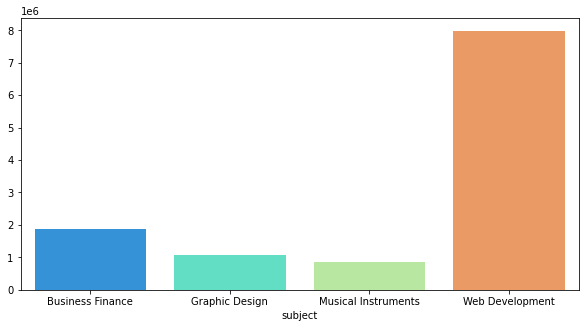

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.groupby('subject')['num_subscribers'].sum().index,
            y=df.groupby('subject')['num_subscribers'].sum().values,
            palette='rainbow')

##### Number of subscribers per year

In [49]:
df.groupby('year')['num_subscribers'].sum()

year
2011     119028
2012     555339
2013    1723438
2014    1930406
2015    3475324
2016    2966644
2017     991007
Name: num_subscribers, dtype: int64

<AxesSubplot:ylabel='num_subscribers'>

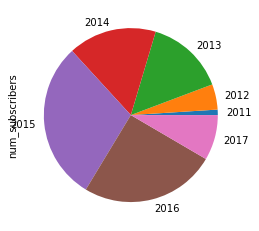

In [51]:
df.groupby('year')['num_subscribers'].sum().plot(kind='pie')

##### Number of people purchased course titled: "So you think you know JavaScript?"

In [55]:
df[df['course_title'] == 'So you think you know JavaScript?']['num_subscribers'].values

array([1010], dtype=int64)

---

+ ***Levels***
    - How many levels do we have
    - What is the distribution of courses per levels
    - Which subject have the highest levels
    - How many subscribers per levels
    - How many courses per levels

##### How many levels do we have?

In [94]:
df['level'].value_counts()

All Levels            1932
Beginner Level        1271
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

In [95]:
# Drop invalid record '52'
df.drop(df[df['level'] == '52'].index, axis=0, inplace=True)

<AxesSubplot:xlabel='level', ylabel='count'>

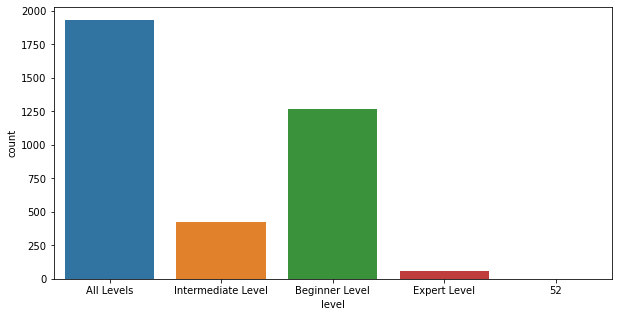

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(df['level'])

##### How many levels per subject category

In [66]:
df.groupby(['subject'])['level'].count()

subject
Business Finance       1199
Graphic Design          603
Musical Instruments     681
Web Development        1200
Name: level, dtype: int64

<AxesSubplot:xlabel='subject'>

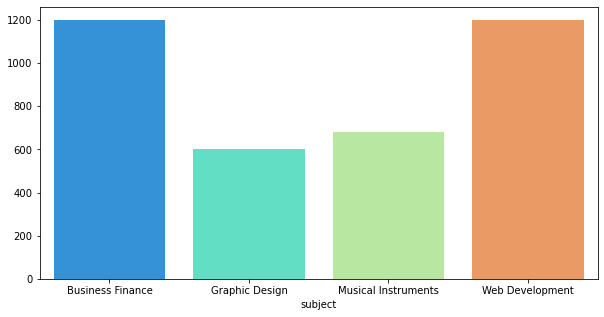

In [64]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.groupby(['subject'])['level'].count().index,
            y=df.groupby(['subject'])['level'].count().values,
            palette='rainbow')

##### Number of levels per subject category

In [72]:
df.groupby(['subject'])['level'].value_counts()

subject              level             
Business Finance     All Levels            699
                     Beginner Level        341
                     Intermediate Level    128
                     Expert Level           31
Graphic Design       All Levels            298
                     Beginner Level        243
                     Intermediate Level     57
                     Expert Level            5
Musical Instruments  Beginner Level        296
                     All Levels            276
                     Intermediate Level    101
                     Expert Level            7
                     52                      1
Web Development      All Levels            659
                     Beginner Level        391
                     Intermediate Level    135
                     Expert Level           15
Name: level, dtype: int64

In [74]:
df.groupby(['subject'])['level'].value_counts().values

array([699, 341, 128,  31, 298, 243,  57,   5, 296, 276, 101,   7,   1,
       659, 391, 135,  15], dtype=int64)

In [75]:
df.groupby(['subject'])['level'].value_counts().index

MultiIndex([(   'Business Finance',         'All Levels'),
            (   'Business Finance',     'Beginner Level'),
            (   'Business Finance', 'Intermediate Level'),
            (   'Business Finance',       'Expert Level'),
            (     'Graphic Design',         'All Levels'),
            (     'Graphic Design',     'Beginner Level'),
            (     'Graphic Design', 'Intermediate Level'),
            (     'Graphic Design',       'Expert Level'),
            ('Musical Instruments',     'Beginner Level'),
            ('Musical Instruments',         'All Levels'),
            ('Musical Instruments', 'Intermediate Level'),
            ('Musical Instruments',       'Expert Level'),
            ('Musical Instruments',                 '52'),
            (    'Web Development',         'All Levels'),
            (    'Web Development',     'Beginner Level'),
            (    'Web Development', 'Intermediate Level'),
            (    'Web Development',       'Expert Level'

Text(0, 0.5, 'Count of Levels')

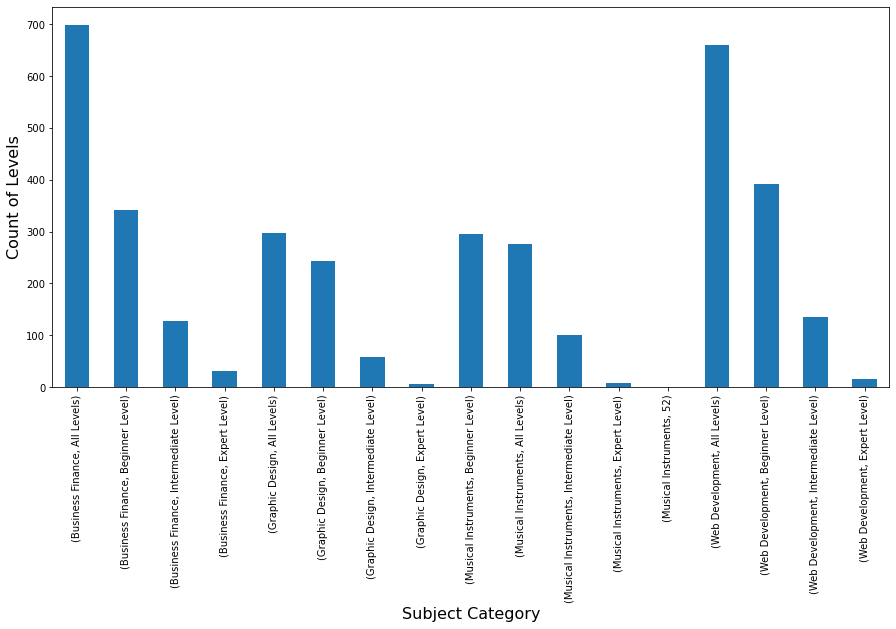

In [80]:
plt.figure(figsize=(15,7))
df.groupby(['subject'])['level'].value_counts().plot(kind = 'bar')
plt.xlabel('Subject Category',fontsize = 16)
plt.ylabel('Count of Levels',fontsize = 16)

##### Number of levels and subscribers count

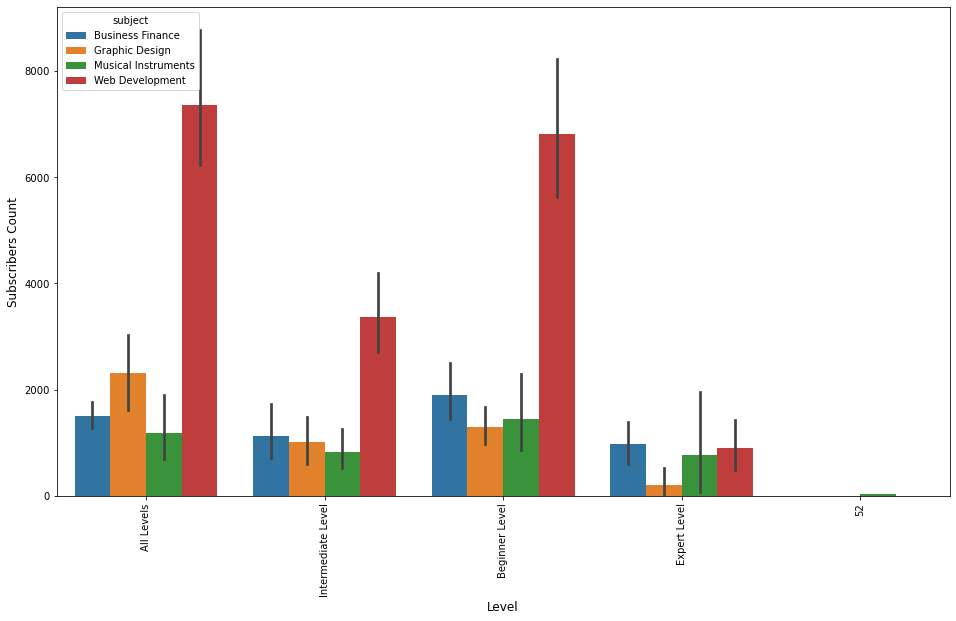

In [84]:
plt.figure(figsize=(16,9))
sns.barplot(x='level', y='num_subscribers', hue='subject', data=df)
plt.xlabel('Level',fontsize = 12)
plt.ylabel('Subscribers Count',fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.show()

##### Number of levels and number of lectures count

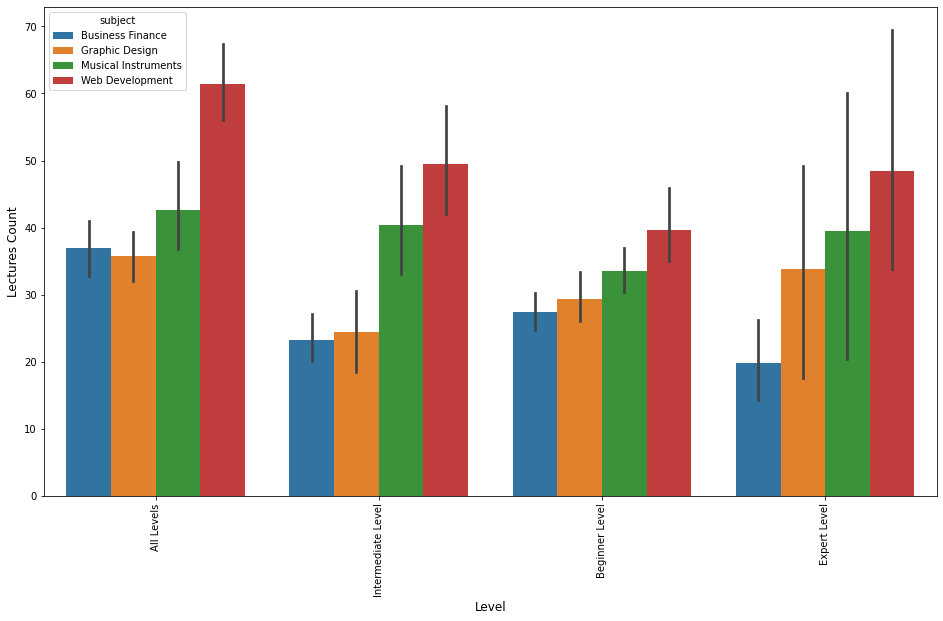

In [97]:
plt.figure(figsize=(16,9))
sns.barplot(x='level', y='num_lectures', hue='subject', data=df)
plt.xlabel('Level',fontsize = 12)
plt.ylabel('Lectures Count',fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.show()

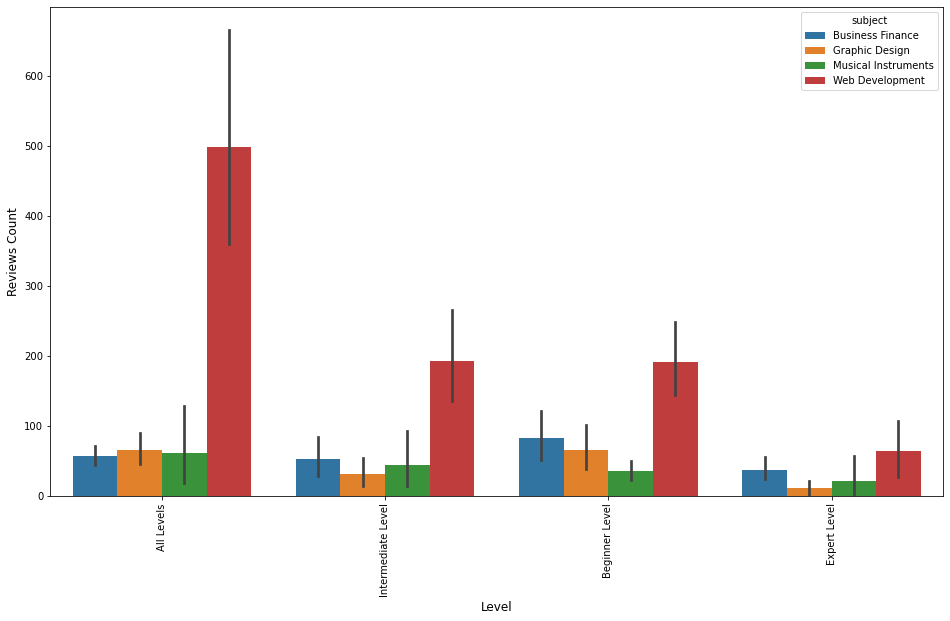

In [96]:
plt.figure(figsize=(16,9))
sns.barplot(x='level', y='num_reviews', hue='subject', data=df)
plt.xlabel('Level',fontsize = 12)
plt.ylabel('Reviews Count',fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.show()

---

+ ***Price***
	- What is the average price of a course
	- What is the min/max price
	- How much does Udemy earn
	- The most profitable courses

##### All available prices

In [102]:
df['price'].unique()

array([200,  75,  45,  95, 150,  65, 195,  30,  20,  50, 175, 140, 115,
       190, 125,  60, 145, 105, 155, 185, 180, 120,  25, 160,  40,   0,
       100,  90,  35,  80,  70,  55, 165, 130,  85, 170, 110, 135],
      dtype=int64)

##### How many courses in each price

In [146]:
# df['price'].value_counts()

<AxesSubplot:>

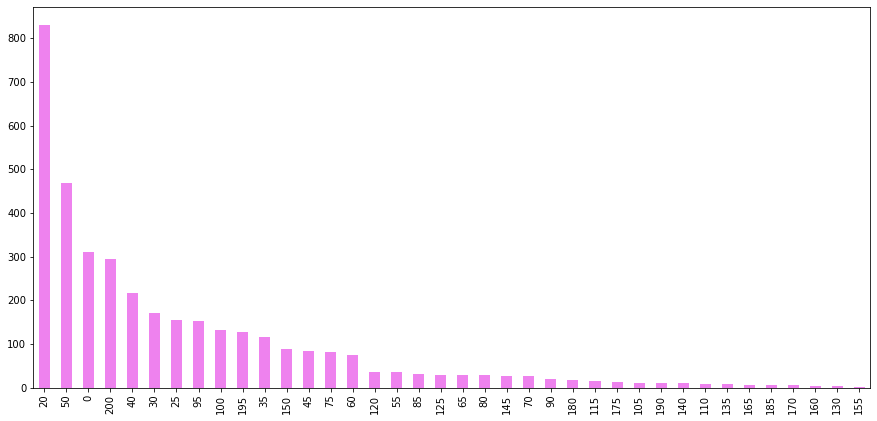

In [103]:
plt.figure(figsize=(15,7))
df['price'].value_counts().plot(kind = 'bar',color = 'violet')

##### The most / least profitable course

In [108]:
df[df['profit']==df['profit'].max()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
3235,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43 hours,2015-11-02T21:13:27Z,Web Development,24316800,2015-11-02,21:13:27Z,2015,11,2


In [124]:
df.iloc[df[(df['price']==20)]['profit'].idxmin()].to_frame().T

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
455,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,37 mins,2016-05-16T18:28:30Z,Business Finance,0,2016-05-16,18:28:30Z,2016,5,16


In [141]:
df['is_paid'].value_counts()

True     3372
False     310
Name: is_paid, dtype: int64

<AxesSubplot:xlabel='is_paid', ylabel='count'>

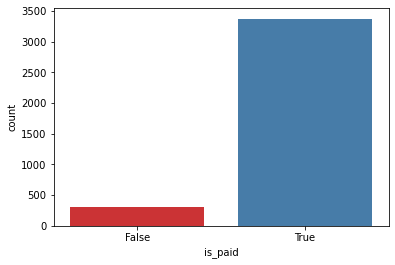

In [144]:
sns.countplot(x = 'is_paid',data=df,palette='Set1')

In [145]:
df.groupby(['is_paid'])['subject'].value_counts()

is_paid  subject            
False    Web Development         133
         Business Finance         96
         Musical Instruments      46
         Graphic Design           35
True     Business Finance       1103
         Web Development        1067
         Musical Instruments     634
         Graphic Design          568
Name: subject, dtype: int64

Text(0, 0.5, 'Count of Courses')

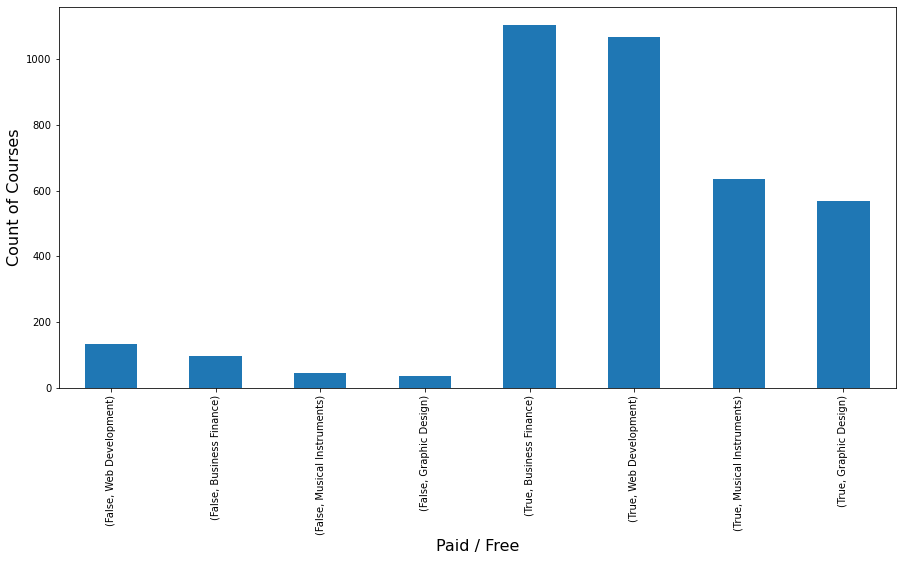

In [148]:
plt.figure(figsize=(15,7))
df.groupby(['is_paid'])['subject'].value_counts().plot(kind = 'bar')
plt.xlabel('Paid / Free',fontsize = 16)
plt.ylabel('Count of Courses',fontsize = 16)

---

- ***Time***

##### Profit year wise

In [159]:
df.groupby(['year'])['profit'].sum()

year
2011     11643420
2012     11773470
2013     72652195
2014    106939045
2015    314510395
2016    276633190
2017     90830680
Name: profit, dtype: int64

Text(0, 0.5, 'Profit')

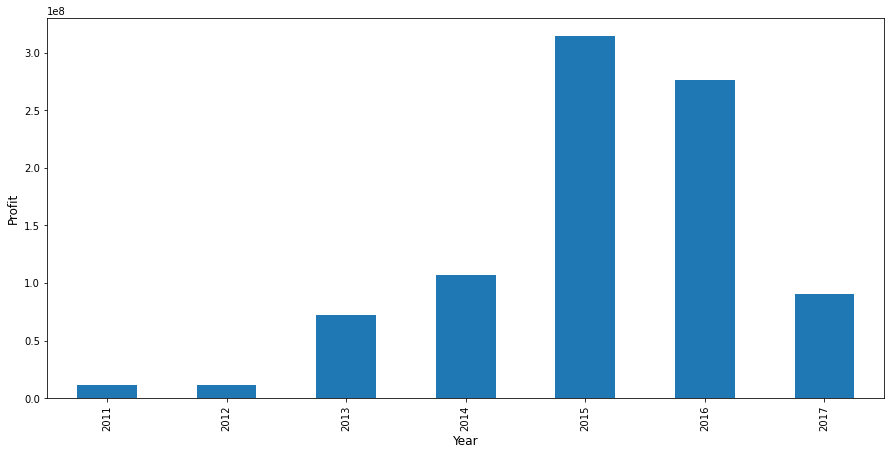

In [160]:
plt.figure(figsize=(15,7))
df.groupby(['year'])['profit'].sum().plot(kind = 'bar')
plt.xlabel('Year',fontsize = 12)
plt.ylabel('Profit',fontsize = 12)

##### Number of subscribers per year

Text(0, 0.5, 'Subscribers')

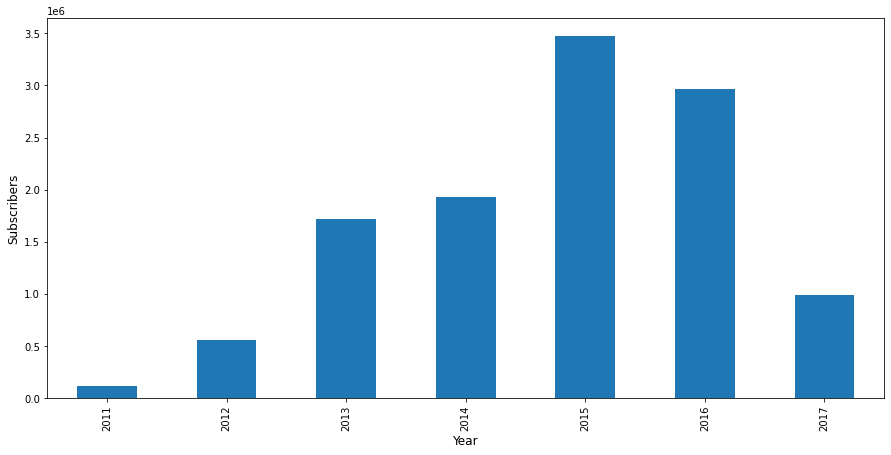

In [169]:
plt.figure(figsize=(15,7))
df.groupby(['year'])['num_subscribers'].sum().plot(kind = 'bar')
plt.xlabel('Year',fontsize = 12)
plt.ylabel('Subscribers',fontsize = 12)

##### Profit month wise year 2015

In [165]:
df[df['year'] == 2015].groupby(['month'])['profit'].sum()

month
1     12004455
2     18219190
3     29182065
4     16701795
5      9772990
6     17398250
7     26023760
8     48955570
9     26729945
10    28091660
11    54669190
12    26761525
Name: profit, dtype: int64

Text(0, 0.5, 'Profit')

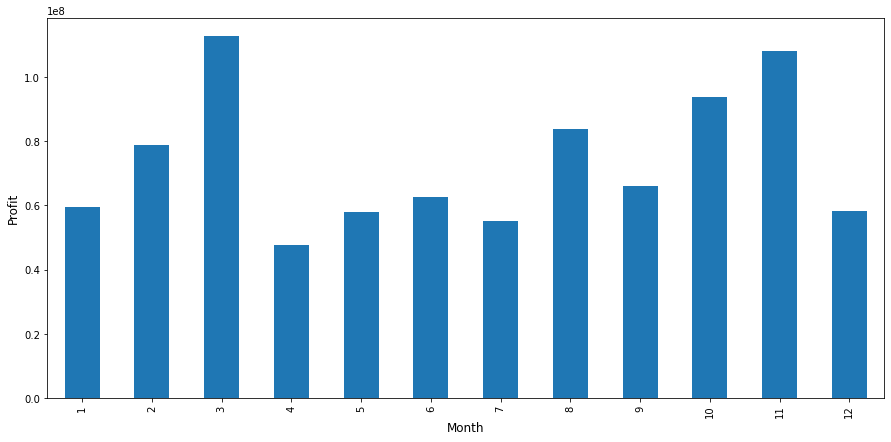

In [167]:
plt.figure(figsize=(15,7))
df.groupby(['month'])['profit'].sum().plot(kind = 'bar')
plt.xlabel('Month',fontsize = 12)
plt.ylabel('Profit',fontsize = 12)

---

- ***Correlation***

<AxesSubplot:>

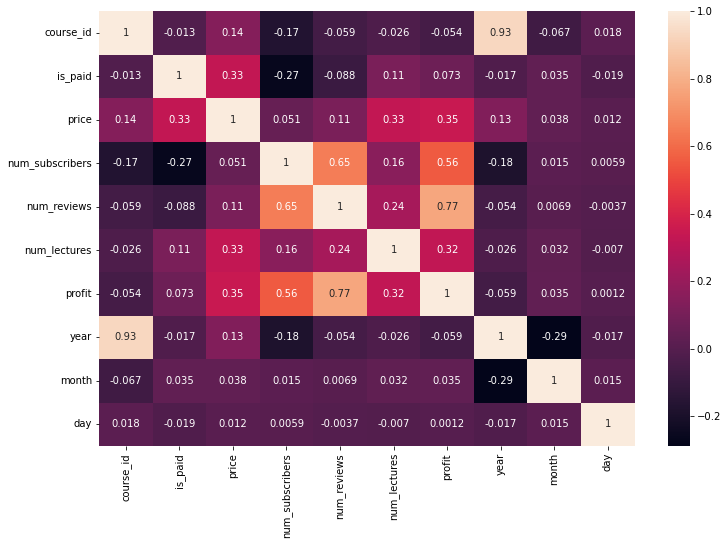

In [128]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

---

# THANK YOU!